In [102]:
import nbsetup as nb
import ergodicpy as ep
import numpy as np
from simulations.wealth.series import series

In [106]:
standard = {'agents': 200, 'ensembles': 10, 'level':10, 'steps': 2000, 'output': nb.cp}

# Disordered system with varying initial conditions

First we'll look at the wealth distribution without any "complex" behaviour as we say in 4.1.b.

When all agents start with the same default wealth of 1 (normalised to the `level` parameter), every ensemble quickly converges to the same high entropy distribution.

In [108]:
flat_initial = [np.ones(standard['agents']) for _ in range(standard['ensembles'])]

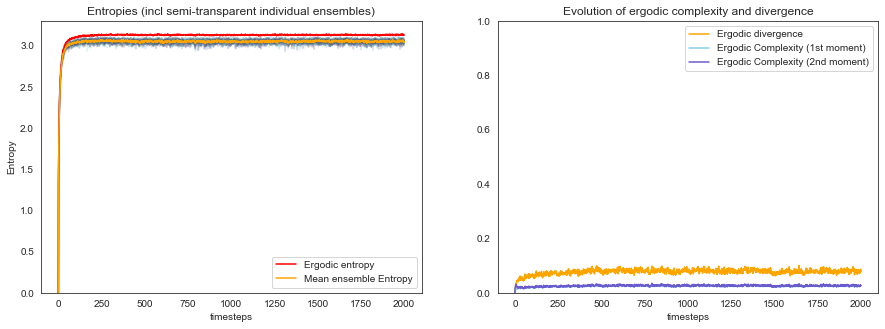

In [107]:
uniform = series(initial=flat_initial, **standard)

# Stable equilibrium for varying initial conditions with disordered systems

Now, if we vary the initial conditions for these states, since it's a disordered system - it converges to the same stable equilibrium point (i.e. the system quickly tends to it's highest entropy distribution).

Baring in mind the total system value (i.e. money in circulation or temperature of the system) gets normalised by `level`, so it doesn't matter the total wealths going in in each ensemble. This macro-variable is what dictates the mode and mean of the output distributions. But we do want to keep the total number of agents consistent.

In [81]:
def gen_varying_initial_wealths(agents, ensembles):
    wealths = []
    for i in range(1,ensembles+1):
        x = int(i*agents/ensembles)
        wealths.append(np.hstack([np.ones(x)*5, np.ones(agents-x)]))
    return wealths

# for example the distributions of wealths look like
gen_varying_initial_wealths(5, 5)

[array([5., 1., 1., 1., 1.]),
 array([5., 5., 1., 1., 1.]),
 array([5., 5., 5., 1., 1.]),
 array([5., 5., 5., 5., 1.]),
 array([5., 5., 5., 5., 5.])]

What we see is the system is in a high ergodic complexity state initially, since all the distributions start off very different. However, the system keeps going toward it's final disordered path toward it's high entropy state. Meaning all the ensembles tend toward the same high entropy state and ergodic complexity reduces right down.

In [109]:
vary_initial = gen_varying_initial_wealths(standard['agents'], standard['ensembles'])

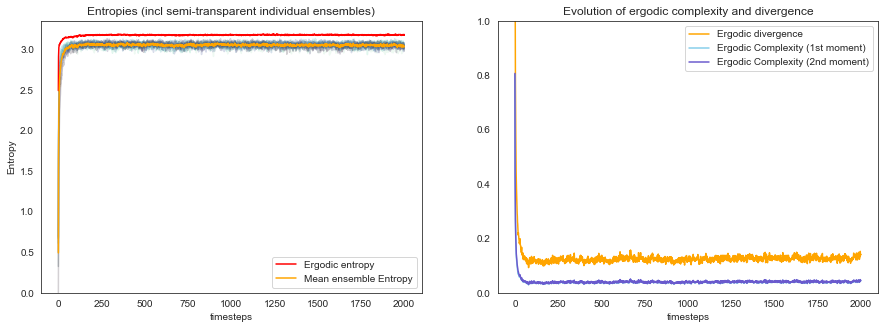

In [100]:
random = series(initial=vary_initial, **standard)

# Complex systems

Now let's look at how varying the initial conditions affects a complex system. First we'll baseline it, with just a very small amount of "complex" behaviour (see 4.1.b but this time we're only transfering 1 unit rather than a percentage which makes the effect much smaller as it slows the propogation of wealth throughout the system).

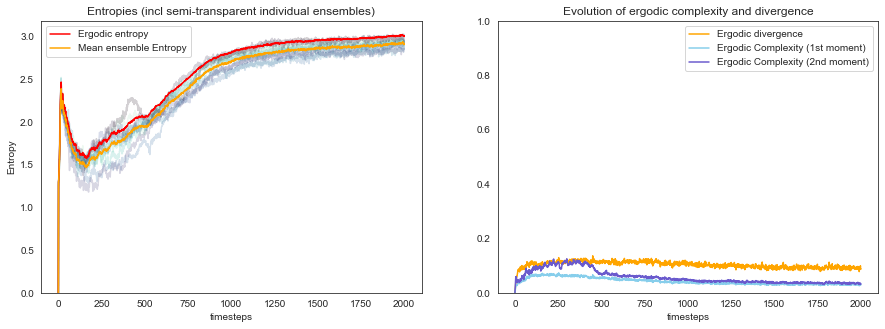

In [96]:
thresholded = series(initial=flat_initial, threshold=2.0, log=True, **standard)

What we see above is the clear entropy "dip" on the left, which corresponds to a "ergodic complexity hump" on the right. Plus we can see the individual (blue) entropies on the left graph varying heavily during the complex period. However the effect is small and the system returns to a low complexity as before, as the "complex behaviour" wears off and the disordered behaviour takes over.

Next we look at the case where initial results are varied. Here we see it starts with a high ergodic complexity, which makes sense as all the initial states are different. However we see clearly distinct entropic paths (the blue lines on the left) of the individual ensembles, even though they start at a relatively similar entropic level. While the ergodic entropy (red left) is far higher than any of the entropic states, neatly illustrating that ergodic complexity is highest when the individual entropies _are low but very different versions of low_.

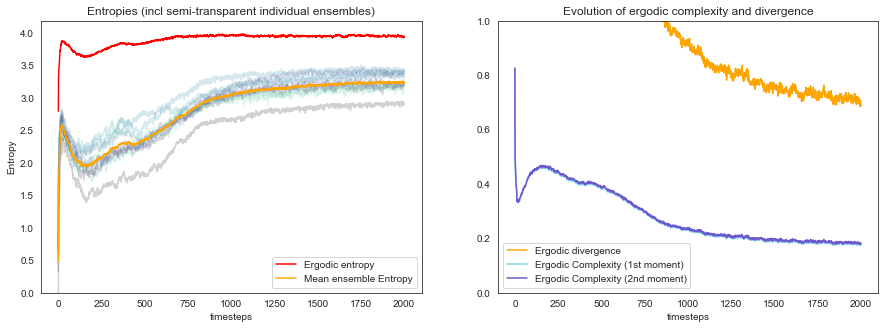

In [97]:
thresholded_vary = series(initial=vary_initial, threshold=2.0, log=True, **standard)